In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import numpy as np
import pandas as pd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


15 15


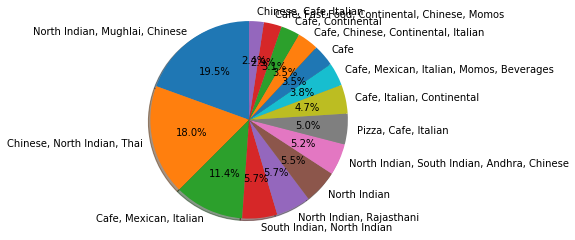

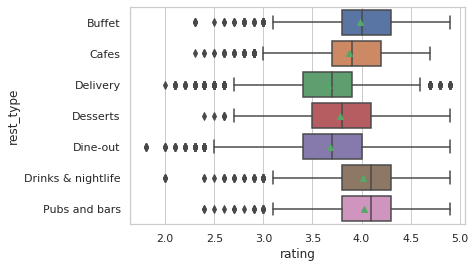

In [121]:

df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v2.csv')
df = df.dropna()

import matplotlib.pyplot as plt
names = df['cuisines'].unique().tolist()
res = df['cuisines'].value_counts().tolist()
names = names[:15]
res = res[:15]
print(len(res),len(names))
fig1, ax1 = plt.subplots()
ax1.pie(res, labels=names, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="rating", y="rest_type", data=df,showmeans=True)


In [125]:

df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v2.csv')
df = df.dropna()

df = df.drop(['Unnamed: 0','name','address','reviews_list','cuisines'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['location'] = le.fit_transform(df.location.values)
df['rest_type'] = le.fit_transform(df.rest_type.values)

target = 'rating'
train_y = df[target].to_numpy()
train_y = train_y.reshape(-1,1)
df = df.drop([target], axis=1)
print(df.shape)
print(df.columns.tolist())

train_y = pd.DataFrame(train_y)
df[target]=train_y
print(df.shape)
print(df.columns.tolist())

dataset = df.to_numpy()
print(dataset.shape)
train_y = dataset[:,-1]
train_y = train_y.reshape(-1,1)
train_x = dataset[:,:-1]
print(train_x.shape,train_y.shape)


def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_m1(x):
    return -np.log((1/x)-1)
train_y = train_y/5

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(x_train,sigmoid_m1(y_train*0.9+0.05))
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
#print(y_test*5)
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test*5,y11_pred)," RMSE ERROR ON TEST Linear Regression ")
print(mean_absolute_error(y_test*5,y11_pred)," MAE ERROR ON TEST Linear Regression ")
print(mean_squared_error(y_train*5,y12_pred)," RMSE ERROR ON TRAIN Linear Regression ")
print(mean_absolute_error(y_train*5,y12_pred)," MAE ERROR ON TRAIN Linear Regression ")
print()

reg = Ridge(alpha=1.0);reg.fit(x_train,sigmoid_m1(y_train*0.9+0.05));
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test*5,y11_pred)," RMSE ERROR ON TEST Ridge Regression ")
print(mean_absolute_error(y_test*5,y11_pred)," MAE ERROR ON TEST Ridge Regression ")
print(mean_squared_error(y_train*5,y12_pred)," RMSE ERROR ON TRAIN Ridge Regression ")
print(mean_absolute_error(y_train*5,y12_pred)," MAE ERROR ON TRAIN Ridge Regression ")
print()

reg = linear_model.Lasso(alpha=0.1);reg.fit(x_train,sigmoid_m1(y_train*0.9+0.05));
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test*5,y11_pred)," RMSE ERROR ON TEST Lasso Regression ")
print(mean_absolute_error(y_test*5,y11_pred)," MAE ERROR ON TEST Lasso Regression ")
print(mean_squared_error(y_train*5,y12_pred)," RMSE ERROR ON TRAIN Lasso Regression ")
print(mean_absolute_error(y_train*5,y12_pred)," MAE ERROR ON TRAIN Lasso Regression ")
print()

reg = RandomForestRegressor();reg.fit(x_train,sigmoid_m1(y_train*0.9+0.05));
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test*5,y11_pred)," RMSE ERROR ON TEST Random Forest Regression ")
print(mean_absolute_error(y_test*5,y11_pred)," MAE ERROR ON TEST Random Forest Regression ")
print(mean_squared_error(y_train*5,y12_pred)," RMSE ERROR ON TRAIN Random Forest Regression ")
print(mean_absolute_error(y_train*5,y12_pred)," MAE ERROR ON TRAIN Random Forest Regression ")
print()

(41263, 6)
['location', 'rest_type', 'cost(per person)', 'online_order', 'book_table', 'votes']
(41263, 7)
['location', 'rest_type', 'cost(per person)', 'online_order', 'book_table', 'votes', 'rating']
(41263, 7)
(41263, 6) (41263, 1)
(30947, 6) (10316, 6) (30947, 1) (10316, 1)
0.14570828786130618  RMSE ERROR ON TEST Linear Regression 
0.3067713670432889  MAE ERROR ON TEST Linear Regression 
0.14404575173000192  RMSE ERROR ON TRAIN Linear Regression 
0.3049355165287001  MAE ERROR ON TRAIN Linear Regression 

0.14570859827898805  RMSE ERROR ON TEST Ridge Regression 
0.30677187896997915  MAE ERROR ON TEST Ridge Regression 
0.14404593392352144  RMSE ERROR ON TRAIN Ridge Regression 
0.30493625520876194  MAE ERROR ON TRAIN Ridge Regression 

0.15267577734246  RMSE ERROR ON TEST Lasso Regression 
0.3158113834654134  MAE ERROR ON TEST Lasso Regression 
0.15085319430755045  RMSE ERROR ON TRAIN Lasso Regression 
0.3143693986253822  MAE ERROR ON TRAIN Lasso Regression 



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.04716566722424473  RMSE ERROR ON TEST Random Forest Regression 
0.1699695162515761  MAE ERROR ON TEST Random Forest Regression 
0.024483980010475376  RMSE ERROR ON TRAIN Random Forest Regression 
0.1368075796749053  MAE ERROR ON TRAIN Random Forest Regression 



In [0]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

"""
Reference:-
https://www.datacamp.com/community/tutorials/wordcloud-python
https://www.geeksforgeeks.org/generating-word-cloud-python/
"""

['location', 'rest_type', 'cost(per person)', 'online_order', 'book_table', 'rating', 'votes', 'revenue', 'reviews_list']
BTM
0
Commercial Street
1
Bannerghatta Road
2


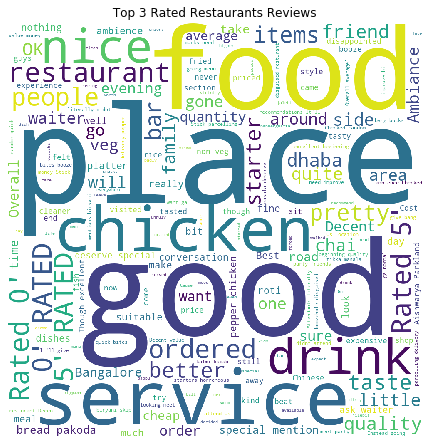

In [85]:
df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v3.csv')
df = df.dropna()
df = df.drop(['Unnamed: 0','name','address','cuisines'], axis=1)
print(df.columns.tolist())

df = df.sort_values('rating',ascending=False)
count = 0
whole = " "
for index,row in df.iterrows():
  print(df.iloc[index,0])
  review = df.iloc[index,8]
  revs = review.split('"),')
  sense1 = ''
  for f in range(len(revs)):
    rev = revs[f]
    ind = rev.find("n")
    rev = rev[25:]
    rev = rev.replace('\\n','')
    revs[f] = rev
    sense1 = sense1+' '+revs[f]
    #print(revs[f])
    sense1 = sense1[:len(sense1)-3]
  print(count)
  whole = whole+" "+sense1
  count+=1
  if ( count >=3 ):
    break

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1000,height = 1000,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(whole) 
                         
plt.figure(figsize = (6,6)) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.title(" Top 3 Rated Restaurants Reviews ")
plt.tight_layout(pad = 0)
plt.show() 

['location', 'rest_type', 'cost(per person)', 'online_order', 'book_table', 'rating', 'votes', 'revenue', 'reviews_list']
0  Well this place is well know for its beef dishes. This is one of the most sought-after beef places in HSR. I have tried their porotta, kushka, beef Biriyani, beef phaal, masala kabab and sheekh kabab. The Biriyani priced at ?60 is VFM at its . Porotta could be better but the kababs are to die for. The masala kabab is my favourite among the lot. This joint has become one of my go to places whenever I crave for some beefy ness.
1  I was starving and wanted to have egg omlette. This place doesnt serve omlette but had egg bu?ji. So, landed up ordering an egg burji. I liked it, less salt and oil.But after 3 hours, I threw up!So would not recommend.Food:1/5Service:3/5Ambience:1/5pubandgrubsite.wordpress.com'), ('Rated 1.0', 'RATED  Really bad food. Had an egg roll and a chicken roll. Was really hungry.I got a stomach upset after that. And started throwing up. This is a

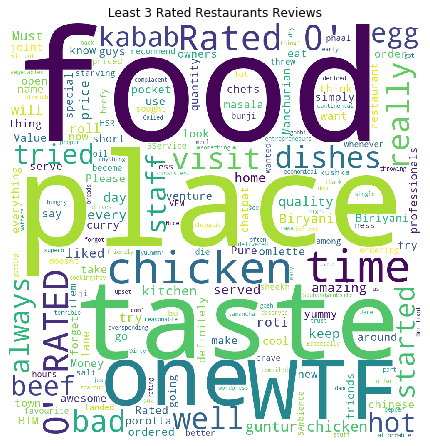

In [117]:
df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v3.csv')
df = df.dropna()
df = df.drop(['Unnamed: 0','name','address','cuisines'], axis=1)
print(df.columns.tolist())

df = df.sort_values('rating',ascending=True)
#print(df.head(10).rating)

count,c = 0,0
whole = " "
for index,row in df.iterrows():
  c+=1
  if c<=50:
    continue
  
  #print(index,df.loc[index,['rating']])
  review = df.iloc[index,-1]
  revs = review.split('"),')
  sense1 = ''
  for f in range(len(revs)):
    rev = revs[f]
    ind = rev.find("n")
    rev = rev[25:]
    rev = rev.replace('\\n','')
    rev = rev.replace('great','')
    rev = rev.replace('good','')
    rev = rev.replace('best','')
    rev = rev.replace('Amazing','')
    rev = rev.replace('Awesome','')
    rev = rev.replace('friendly','')
    
    revs[f] = rev
    sense1 = sense1+' '+revs[f]
    #print(revs[f])
    sense1 = sense1[:len(sense1)-3]
  print(count,sense1)
  whole = whole+" "+sense1
  if c>50:
    count+=1
  if ( count >=3 ):
    break

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1000,height = 1000,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(whole) 
                         
plt.figure(figsize = (6,6)) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.title(" Least 3 Rated Restaurants Reviews ")
plt.tight_layout(pad = 0)
plt.show() 


['location', 'rest_type', 'cost(per person)', 'online_order', 'book_table', 'rating', 'votes', 'revenue', 'reviews_list']


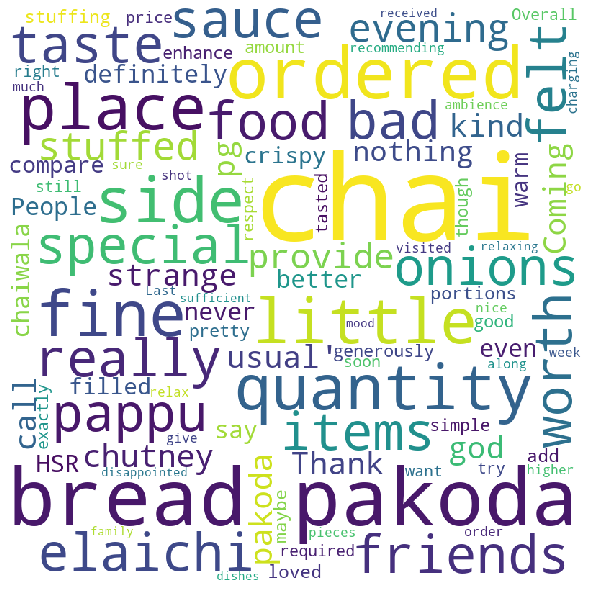

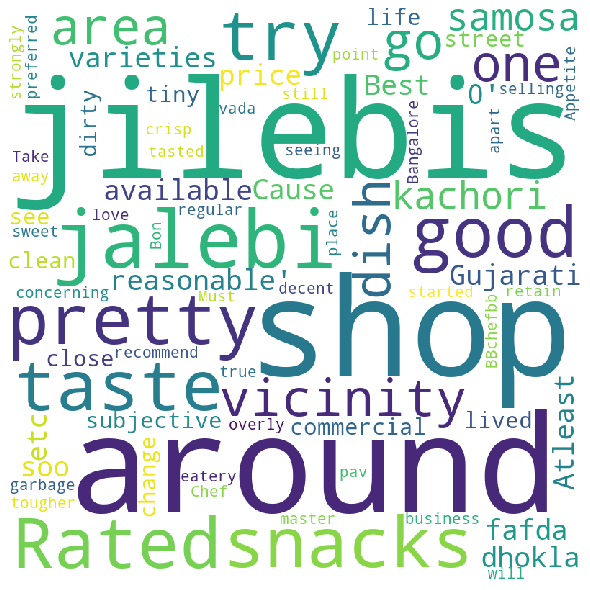

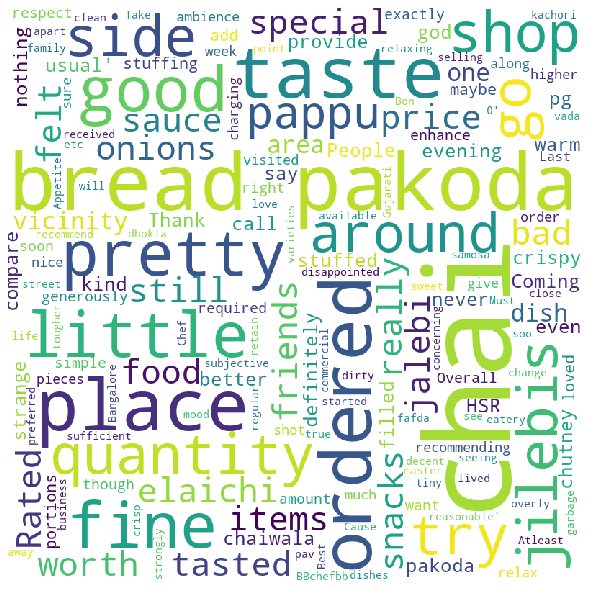

In [0]:
df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v3.csv')
df = df.dropna()
df = df.drop(['Unnamed: 0','name','address','cuisines'], axis=1)
print(df.columns.tolist())
df = df.sort_values('rating',ascending=False)
#print(df.head(10))

review = df.iloc[29464,8]
revs = review.split('"),')
sense2 = ''
for f in range(len(revs)):
  rev = revs[f]
  ind = rev.find("n")
  rev = rev[25:]
  rev = rev.replace('\\n','')
  revs[f] = rev
  sense2 = sense2+' '+revs[f]
  #print(revs[f])

sense2 = sense2[:len(sense)-3]

sense = sense1+" "+sense2
#print(sense)

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800,height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(sense1)         
plt.figure(figsize = (8, 8),facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()


wordcloud = WordCloud(width = 800,height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(sense2)         
plt.figure(figsize = (8, 8),facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()


wordcloud = WordCloud(width = 800,height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(sense)                     
plt.figure(figsize = (8, 8),facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [0]:
df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v3.csv')
df = df.dropna()
print(df.columns.tolist())

df = df.drop(['Unnamed: 0','name','address','reviews_list','cuisines','cost(per person)','votes'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['location'] = le.fit_transform(df.location.values)
df['rest_type'] = le.fit_transform(df.rest_type.values)

target = 'revenue'
train_y = df[target].to_numpy()
train_y = train_y.reshape(-1,1)
df = df.drop([target], axis=1)

train_y = pd.DataFrame(train_y)
df[target]=train_y
print(df.columns.tolist())

dataset = df.to_numpy()
print(dataset.shape)

np.random.shuffle(dataset)

train = dataset[:30947,:]
test = dataset[30947:,:]
print(train.shape,test.shape)

train_x = train[:,0:7]
train_y = train[:,7].reshape(-1,1)
print(train_x.shape,train_y.shape)

test_x = test[:,0:7]
test_y = test[:,7].reshape(-1,1)
print(test_x.shape,test_y.shape)

xtest0 = test[test[:,3] == 0 ]
xtest1 = test[test[:,3] == 1 ]
print(xtest0.shape,xtest1.shape)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(mean_squared_error(test_y,y_pred)," RMSE LR Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE LR Revenue ")
print()


reg = RandomForestRegressor().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(mean_squared_error(test_y,y_pred)," RMSE RF Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE RF Revenue ")
print()


reg = linear_model.Lasso().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(mean_squared_error(test_y,y_pred)," RMSE Lasso Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE Lasso Revenue ")
print()

print(test_y.shape,test_x.shape,y_pred.shape)

"""
yt0 = xtest0[:,7].reshape(-1,1)
xt0 = xtest0[:,0:7]
print(xt0.shape,yt0.shape)

ypred1 = reg.predict(xt0)
xt0[:,3] = 1
ypred2 = reg.predict(xt0)

print(np.mean(ypred2-ypred1))

yt1 = xtest1[:,7].reshape(-1,1)
xt1 = xtest1[:,0:7]
print(xt1.shape,yt1.shape)
xt1[:,3] = 0
y_pred = reg.predict(xt1)
"""

"""

train_y = dataset[:,-1]
train_y = train_y.reshape(-1,1)
train_x = dataset[:,:-1]
print(train_x.shape,train_y.shape)
#I = A[A[:,1] == i]
"""



In [120]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v3.csv')
df = df.dropna()
print(df.columns.tolist())

df = df.drop(['Unnamed: 0','name','address','reviews_list','cuisines','cost(per person)','votes'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['location'] = le.fit_transform(df.location.values)
df['rest_type'] = le.fit_transform(df.rest_type.values)

target = 'revenue'
train_y = df[target].to_numpy()
train_y = train_y.reshape(-1,1)
df = df.drop([target], axis=1)

train_y = pd.DataFrame(train_y)
df[target]=train_y
print(df.columns.tolist())

dataset = df.to_numpy()
print(dataset.shape)

np.random.shuffle(dataset)

train = dataset[:30947,:]
test = dataset[30947:,:]
print(train.shape,test.shape)

train_x = train[:,0:5]
train_y = train[:,5].reshape(-1,1)
print(train_x.shape,train_y.shape)

test_x = test[:,0:5]
test_y = test[:,5].reshape(-1,1)
print(test_x.shape,test_y.shape)

xtest0 = test[test[:,2] == 0 ]
xtest1 = test[test[:,2] == 1 ]
print(xtest0.shape,xtest1.shape)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(np.sqrt(mean_squared_error(test_y,y_pred))," RMSE LR Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE LR Revenue ")
print()


reg = RandomForestRegressor().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(np.sqrt(mean_squared_error(test_y,y_pred))," RMSE RF Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE RF Revenue ")
print()


reg = linear_model.Lasso().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(np.sqrt(mean_squared_error(test_y,y_pred))," RMSE Lasso Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE Lasso Revenue ")
print()

reg = Ridge().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(np.sqrt(mean_squared_error(test_y,y_pred))," RMSE Ridge Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE Ridge Revenue ")
print()

print(test_y.shape,test_x.shape,y_pred.shape)


['Unnamed: 0', 'name', 'address', 'location', 'rest_type', 'cuisines', 'cost(per person)', 'online_order', 'book_table', 'rating', 'votes', 'revenue', 'reviews_list']
['location', 'rest_type', 'online_order', 'book_table', 'rating', 'revenue']
(41263, 6)
(30947, 6) (10316, 6)
(30947, 5) (30947, 1)
(10316, 5) (10316, 1)
(3566, 6) (6750, 6)
530973.946678883  RMSE LR Revenue 
223771.9611308406  MAE LR Revenue 



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


351321.91535752034  RMSE RF Revenue 
101921.13152153786  MAE RF Revenue 

530974.0677080179  RMSE Lasso Revenue 
223771.08232059082  MAE Lasso Revenue 

530975.241635119  RMSE Ridge Revenue 
223766.46575931003  MAE Ridge Revenue 

(10316, 1) (10316, 5) (10316, 1)


'\ndef sigmoid(x):\n    return 1/(1+np.exp(-x))\n\ndef sigmoid_m1(x):\n    return -np.log((1/x)-1)\ntrain_y = train_y/5\n\nfrom sklearn.model_selection import train_test_split\n\nx_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25)\nprint(x_train.shape,x_test.shape,y_train.shape,y_test.shape)\n\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.linear_model import Ridge\nfrom sklearn import linear_model\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import mean_absolute_error\n\nreg = LinearRegression().fit(x_train,sigmoid_m1(y_train*0.9+0.05))\ny11_pred = reg.predict(x_test)\ny11_pred = sigmoid(y11_pred)\ny11_pred = y11_pred*5\nprint(y11_pred)\nprint(y_test*5)\ny12_pred = reg.predict(x_train)\ny12_pred = sigmoid(y12_pred)\ny12_pred = y12_pred*5\nprint(mean_squared_error(y_test*5,y11_pred)," RMSE ERROR ON TEST Linear Regression ")\nprint(mean_absolute_error(y_test*5

In [127]:

"""
Revenue Prediction
"""
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v3.csv')
df = df.dropna()
print(df.columns.tolist())

df = df.drop(['Unnamed: 0','name','address','reviews_list','cuisines','cost(per person)','votes','rating'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['location'] = le.fit_transform(df.location.values)
df['rest_type'] = le.fit_transform(df.rest_type.values)

target = 'revenue'
train_y = df[target].to_numpy()
train_y = train_y.reshape(-1,1)
df = df.drop([target], axis=1)

train_y = pd.DataFrame(train_y)
df[target]=train_y
print(df.columns.tolist())

dataset = df.to_numpy()
print(dataset.shape)

np.random.shuffle(dataset)

train = dataset[:30947,:]
test = dataset[30947:,:]
print(train.shape,test.shape)

train_x = train[:,0:4]
train_y = train[:,4].reshape(-1,1)
print(train_x.shape,train_y.shape)

test_x = test[:,0:4]
test_y = test[:,4].reshape(-1,1)
print(test_x.shape,test_y.shape)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


reg = RandomForestRegressor().fit(train_x,train_y)
y_pred = reg.predict(test_x)
print(np.sqrt(mean_squared_error(test_y,y_pred))," RMSE RF Revenue ")
print(mean_absolute_error(test_y,y_pred)," MAE RF Revenue ")
print()

['Unnamed: 0', 'name', 'address', 'location', 'rest_type', 'cuisines', 'cost(per person)', 'online_order', 'book_table', 'rating', 'votes', 'revenue', 'reviews_list']
['location', 'rest_type', 'online_order', 'book_table', 'revenue']
(41263, 5)
(30947, 5) (10316, 5)
(30947, 4) (30947, 1)
(10316, 4) (10316, 1)
514948.6707316478  RMSE RF Revenue 
171336.89893542885  MAE RF Revenue 



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [134]:
location=input('Enter location of your restaurant: ')
#loca = le.transform(location)
rest_type=input('Enter type of your restaurant: ')
#rest = le.transform(rest_type)
online = input("Enter 1 - Accept online order OR 0 - Dont accept online order")
table = input("Enter 1 - Book tables OR 0 - Dont book tables")

arey = []
arey.append(12);arey.append(4);arey.append(online);arey.append(table);
arey = np.asarray(arey).reshape(1,-1)
#print(arey.shape)
pred = reg.predict(arey)
print(pred," - revenue ")

Enter location of your restaurant: Peenya
Enter type of your restaurant: Buffet
Enter 1 - Accept online order OR 0 - Dont accept online order1
Enter 1 - Book tables OR 0 - Dont book tables0
[576952.55092017]


In [0]:
reg = RandomForestRegressor().fit(train_x,train_y)

yt0 = xtest0[:,5].reshape(-1,1)
xt0 = xtest0[:,0:5]
print(xt0.shape,yt0.shape)

ypred1 = reg.predict(xt0)
xt0[:,2] = 1
ypred2 = reg.predict(xt0)
print(np.mean(ypred2-ypred1)," Diff btw Online and Non-Online for originally Non-Online ")

yt1 = xtest1[:,5].reshape(-1,1)
xt1 = xtest1[:,0:5]
print(xt1.shape,yt1.shape)
ypred1 = reg.predict(xt1)
xt1[:,2] = 0
ypred2 = reg.predict(xt1)
print(np.mean(ypred1-ypred2)," Diff btw Online and Non-Online for originally Online ")


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


(3515, 5) (3515, 1)
9265.04531001487  Diff btw Online and Non-Online for originally Non-Online 
(6801, 5) (6801, 1)
-17362.651690654475  Diff btw Online and Non-Online for originally Online 


In [0]:

df = pd.read_csv('/content/drive/My Drive/DScDataset/Dsc_data_v3.csv')
df = df.dropna()
print(df.columns.tolist())

df = df.drop(['Unnamed: 0','name','address','reviews_list','cuisines','cost(per person)','votes'], axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['location'] = le.fit_transform(df.location.values)
df['rest_type'] = le.fit_transform(df.rest_type.values)

target = 'revenue'
train_y = df[target].to_numpy()
train_y = train_y.reshape(-1,1)
df = df.drop([target], axis=1)

train_y = pd.DataFrame(train_y)
df[target]=train_y
print(df.columns.tolist())

dataset = df.to_numpy()
print(dataset.shape)

np.random.shuffle(dataset)

train = dataset[:30947,:]
test = dataset[30947:,:]
print(train.shape,test.shape)

train_x = train[:,0:5]
train_y = train[:,5].reshape(-1,1)
print(train_x.shape,train_y.shape)

xtest0 = test[test[:,3] == 0 ]
xtest1 = test[test[:,3] == 1 ]
print(xtest0.shape,xtest1.shape)


['Unnamed: 0', 'name', 'address', 'location', 'rest_type', 'cuisines', 'cost(per person)', 'online_order', 'book_table', 'rating', 'votes', 'revenue', 'reviews_list']
['location', 'rest_type', 'online_order', 'book_table', 'rating', 'revenue']
(41263, 6)
(30947, 6) (10316, 6)
(30947, 5) (30947, 1)
(8676, 6) (1640, 6)


In [0]:
reg = RandomForestRegressor().fit(train_x,train_y)

yt0 = xtest0[:,5].reshape(-1,1)
xt0 = xtest0[:,0:5]
print(xt0.shape,yt0.shape)

ypred1 = reg.predict(xt0)
xt0[:,3] = 1
ypred2 = reg.predict(xt0)
print(np.mean(ypred2-ypred1)," Diff btw Booking Table and Non-Booking Table for originally Non-Booking Table ")

yt1 = xtest1[:,5].reshape(-1,1)
xt1 = xtest1[:,0:5]
print(xt1.shape,yt1.shape)
#print(xt1)

ypred1 = reg.predict(xt1)
xt1[:,3] = 0
#print(xt1)

ypred2 = reg.predict(xt1)
print(np.mean(ypred1-ypred2)," Diff btw Booking Table and Non-Booking Table for originally Booking Table ")


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


(8676, 5) (8676, 1)
172646.9406366161  Diff btw Booking Table and Non-Booking Table for originally Non-Booking Table 
(1640, 5) (1640, 1)
308789.35810888  Diff btw Booking Table and Non-Booking Table for originally Booking Table 


In [0]:
"""
Rating Prediction (REGRESSION PROBLEM)
"""
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_m1(x):
    return -np.log((1/x)-1)

train_y = train_y/5

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.22)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(x_train,sigmoid_m1(y_train*0.9+0.05))
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Linear Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Linear Regression ")
print(mean_squared_error(y_train,y12_pred)," RMSE ERROR ON TRAIN Linear Regression ")
print(mean_absolute_error(y_train,y12_pred)," MAE ERROR ON TRAIN Linear Regression ")
print()

reg = Ridge(alpha=1.0);reg.fit(x_train,sigmoid_m1(y_train*0.9+0.05));
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Ridge Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Ridge Regression ")
print(mean_squared_error(y_train,y12_pred)," RMSE ERROR ON TRAIN Ridge Regression ")
print(mean_absolute_error(y_train,y12_pred)," MAE ERROR ON TRAIN Ridge Regression ")
print()

reg = linear_model.Lasso(alpha=0.1);reg.fit(x_train,sigmoid_m1(y_train*0.9+0.05));
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Lasso Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Lasso Regression ")
print(mean_squared_error(y_train,y12_pred)," RMSE ERROR ON TRAIN Lasso Regression ")
print(mean_absolute_error(y_train,y12_pred)," MAE ERROR ON TRAIN Lasso Regression ")
print()

reg = RandomForestRegressor();reg.fit(x_train,sigmoid_m1(y_train*0.9+0.05));
y11_pred = reg.predict(x_test)
y11_pred = sigmoid(y11_pred)
y11_pred = y11_pred*5
y12_pred = reg.predict(x_train)
y12_pred = sigmoid(y12_pred)
y12_pred = y12_pred*5
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Random Forest Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Random Forest Regression ")
print(mean_squared_error(y_train,y12_pred)," RMSE ERROR ON TRAIN Random Forest Regression ")
print(mean_absolute_error(y_train,y12_pred)," MAE ERROR ON TRAIN Random Forest Regression ")
print()

(32185, 6) (9078, 6) (32185, 1) (9078, 1)
8.22440841840808  RMSE ERROR ON TEST Linear Regression 
2.86276340991702  MAE ERROR ON TEST Linear Regression 
8.23181684221171  RMSE ERROR ON TRAIN Linear Regression 
2.864002609363176  MAE ERROR ON TRAIN Linear Regression 

8.224408934702947  RMSE ERROR ON TEST Ridge Regression 
2.8627640148010287  MAE ERROR ON TEST Ridge Regression 
8.231819738131342  RMSE ERROR ON TRAIN Ridge Regression 
2.8640036291299493  MAE ERROR ON TRAIN Ridge Regression 

8.222620145751568  RMSE ERROR ON TEST Lasso Regression 
2.863314616246757  MAE ERROR ON TEST Lasso Regression 
8.236720992335162  RMSE ERROR ON TRAIN Lasso Regression 
2.8657027104046926  MAE ERROR ON TRAIN Lasso Regression 



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8.154856179175344  RMSE ERROR ON TEST Random Forest Regression 
2.8418868295404356  MAE ERROR ON TEST Random Forest Regression 
8.168407521614258  RMSE ERROR ON TRAIN Random Forest Regression 
2.8431199773044744  MAE ERROR ON TRAIN Random Forest Regression 



In [0]:
train_x = np.load('/content/drive/My Drive/DScDataset/train_x.npy')
train_y = np.load('/content/drive/My Drive/DScDataset/train_y.npy')
print(train_x.shape,train_y.shape)
train_y[train_y==5] = 9
train_y[train_y==4.5] = 8
train_y[train_y==4] = 7
train_y[train_y==3.5] = 6
train_y[train_y==3] = 5
train_y[train_y==2.5] = 4
train_y[train_y==2] = 3
train_y[train_y==1.5] = 2
train_y[train_y==1] = 1
uni,counts = np.unique(train_y,return_counts=True)
print(uni)
print(counts)

(17512, 768) (17512, 1)
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[2723  139 1018  217 2601  860 4640  582 4732]


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.22)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

clf = LogisticRegression(solver='saga',max_iter=500).fit(x_train, y_train)
print(clf.score(x_train, y_train)," LOGISTIC ACCURAACY ON TRAIN ")
print(clf.score(x_test, y_test)," LOGISTIC ACCURAACY ON TESt ")
print()

clf = RandomForestClassifier(n_estimators=130).fit(x_train,y_train) 
print(clf.score(x_train, y_train)," Random Forest ACCURAACY ON TRAIN ")
print(clf.score(x_test, y_test)," Random Forest ACCURAACY ON TEST ")
print()

clf = DecisionTreeClassifier().fit(x_train,y_train) 
print(clf.score(x_train, y_train)," Decision Tree ACCURAACY ON TRAIN ")
print(clf.score(x_test, y_test)," Decision Tree ACCURAACY ON TEST ")
print()

(13659, 768) (3853, 768) (13659, 1) (3853, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7692364009078263  LOGISTIC ACCURAACY ON TRAIN 
0.6953023617960031  LOGISTIC ACCURAACY ON TESt 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.9775239768650706  Random Forest ACCURAACY ON TRAIN 
0.8660783804827408  Random Forest ACCURAACY ON TEST 

0.9775239768650706  Decision Tree ACCURAACY ON TRAIN 
0.808720477549961  Decision Tree ACCURAACY ON TEST 



In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.22)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(x_train,y_train)
y11_pred = reg.predict(x_test)
uni,counts = np.unique(y11_pred,return_counts=True)
print(uni.shape)
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Linear Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Linear Regression ")
print()

reg = Ridge(alpha=1.0);reg.fit(x_train,y_train);
y11_pred = reg.predict(x_test)
uni,counts = np.unique(y11_pred,return_counts=True)
print(uni)
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Ridge Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Ridge Regression ")
print()

reg = linear_model.Lasso(alpha=0.1);reg.fit(x_train,y_train);
y11_pred = reg.predict(x_test)
uni,counts = np.unique(y11_pred,return_counts=True)
print(uni)
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Lasso Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Lasso Regression ")
print()

reg = Ridge(alpha=1.0);reg.fit(x_train,y_train);
y11_pred = reg.predict(x_test)
uni,counts = np.unique(y11_pred,return_counts=True)
print(uni)
print(mean_squared_error(y_test,y11_pred)," RMSE ERROR ON TEST Random Forest Regression ")
print(mean_absolute_error(y_test,y11_pred)," MAE ERROR ON TEST Random Forest Regression ")
print()

(13659, 768) (3853, 768) (13659, 1) (3853, 1)
(2716,)
2.0426181046961434  RMSE ERROR ON TEST Linear Regression 
1.1024930565823208  MAE ERROR ON TEST Linear Regression 

[-1.69604062 -1.09288078 -0.93123915 ... 10.81935702 11.04500803
 11.40422201]
2.0371918740201442  RMSE ERROR ON TEST Ridge Regression 
1.102016798681515  MAE ERROR ON TEST Ridge Regression 

[1.23922959 2.34498035 2.40810846 ... 8.47831116 8.49097706 8.54950619]
4.631487830541747  RMSE ERROR ON TEST Lasso Regression 
1.75219203969177  MAE ERROR ON TEST Lasso Regression 

[-1.69604062 -1.09288078 -0.93123915 ... 10.81935702 11.04500803
 11.40422201]
2.0371918740201442  RMSE ERROR ON TEST Random Forest Regression 
1.102016798681515  MAE ERROR ON TEST Random Forest Regression 

